## Curso Analise de Dados - LIneA
Foi utilizado no curso o exemplo de dados de caso de dengue entre 2010 - 2019. Este notebook foi criado para solucionar a questão 10 do formulário de participação do curso.

In [1]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

Importar os dados do github

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/helenocampos/curso_aplicacao_cientifica/refs/heads/main/data_2000_2019.csv")
df

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


Separar os dados de interesse e agrupar pela média para a análise de cada região.

In [14]:
meso = df[['meso_code', 'water_network', 'water_shortage', 'dengue_cases']]
meso = meso.groupby('meso_code').mean()
meso

,water_network,water_shortage,dengue_cases
meso_code,,,
1101,30.500000,0.155900,61.780702
1102,40.736667,0.219850,52.219298
1201,36.325000,0.296800,93.506579
1202,47.250000,0.474967,152.352339
1301,42.955000,0.163700,11.105263
...,...,...,...
5202,72.020000,0.437100,54.828947
5203,79.872000,0.572460,711.808772
5204,73.165000,0.510750,239.502193


Observar visualmente a correlação entre os casos de dengue e o acesso e escassez de água.

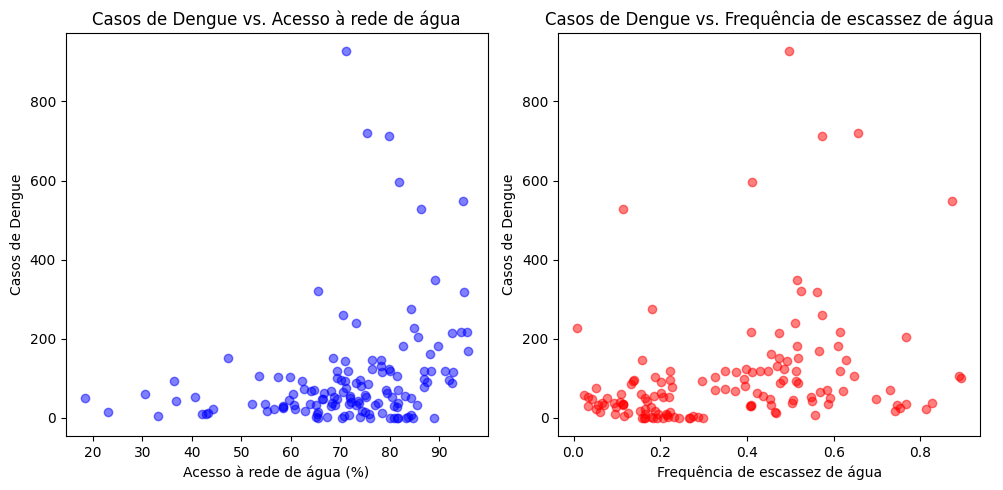

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(meso['water_network'], meso['dengue_cases'], color='blue', alpha=0.5)
axes[0].set_xlabel('Acesso à rede de água (%)')
axes[0].set_ylabel('Casos de Dengue')
axes[0].set_title('Casos de Dengue vs. Acesso à rede de água')

axes[1].scatter(meso['water_shortage'], meso['dengue_cases'], color='red', alpha=0.5)
axes[1].set_xlabel('Frequência de escassez de água')
axes[1].set_ylabel('Casos de Dengue')
axes[1].set_title('Casos de Dengue vs. Frequência de escassez de água')

plt.tight_layout() 
plt.show() 

Gráficos que representam a quantidade de mesoregiões e a porcentagem ao acesso de água e quantidade de casos de dengue no numerico de mesoregiões.

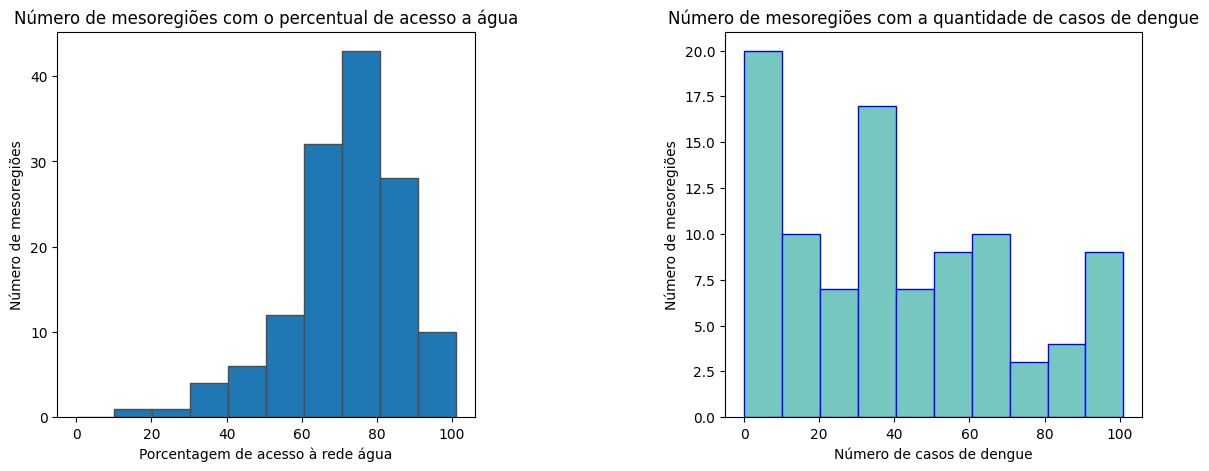

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(
meso['water_network'], 
bins= 10, color='#1f77b4', 
edgecolor='#4d4d4d',range = [0, 101])

axes[1].hist(
meso['dengue_cases'], 
bins= 10, color='#76c7c0', 
edgecolor='blue',range = [0, 101])

axes[0].set_xlabel('Porcentagem de acesso à rede água') 
axes[0].set_ylabel('Número de mesoregiões')
axes[0].set_title('Número de mesoregiões com o percentual de acesso a água')

axes[1].set_xlabel('Número de casos de dengue') 
axes[1].set_ylabel('Número de mesoregiões')
axes[1].set_title('Número de mesoregiões com a quantidade de casos de dengue')

plt.subplots_adjust(wspace=0.6)
plt.show()

Cálculo da matriz de correlação para melhor análise.

In [34]:
meso.corr()

,water_network,water_shortage,dengue_cases
water_network,1.000000,0.143780,0.269351
water_shortage,0.143780,1.000000,0.292739
dengue_cases,0.269351,0.292739,1.000000
